In [2]:
from tqdm import tqdm
import re
import numpy as np
import pandas as pd
import threading
import multiprocessing
from multiprocessing import Process
import time
from matplotlib import pyplot as plt 

# 1.用户历史新闻点击记录

94057it [00:24, 3826.01it/s]


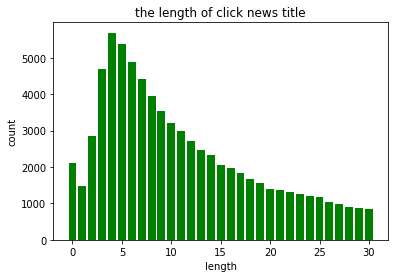

74173


In [6]:
train_behavior = pd.read_csv('./data/train/behaviors.tsv',sep ='\t',header=None)
train_behavior.columns = ['index','id','timeStamp','clickHistory','impressionLog']
test_behavior = pd.read_csv('./data/test/behaviors.tsv',sep ='\t',header=None)
test_behavior.columns = ['index','id','timeStamp','clickHistory','impressionLog']
behavior = pd.concat([train_behavior,test_behavior],0)

temp = behavior.drop_duplicates('id')
history_len_dict = dict()
history_len_dict[0] = 0
for index,row in tqdm(temp.iterrows()):
    if(type(row['clickHistory']) == float):
        history_len_dict[0] += 1
        continue
    key = len(row['clickHistory'].split(' '))
    if key not in history_len_dict:
        history_len_dict[key] = 1
    else:
        history_len_dict[key] += 1


temp_x =  history_len_dict.keys()
temp_y =  history_len_dict.values()
x = []
y = []
sum_value = 0
for index in temp_x:
    if(index <=30):
        x.append(index)
        y.append(history_len_dict[index])
        sum_value += history_len_dict[index]

plt.bar(x, y, color =  'g',align =  'center') 
plt.title('the length of click news title') 
plt.ylabel('count') 
plt.xlabel('length') 
plt.show()
print(sum_value)

In [ ]:
temp_x = list(temp_x)
temp_y = list(temp_y)

value = 0
for index in range(len(temp_x)):
    value += temp_x[index] * temp_y[index]
value / temp.shape[0]

In [4]:
user_item = pd.read_csv('./data/user_item_nearst.csv')
user_item['item'] = user_item['item'].apply(lambda x : eval(x))
user_item

,user,item
0,U63482,"['N62671', 'N28681', 'N33080', 'N43005', 'N687..."
1,U88718,"['N62671', 'N28681', 'N7170', 'N6763', 'N17488..."
2,U44701,"['N62671', 'N28681', 'N33080', 'N18043', 'N176..."
3,U59594,"['N28681', 'N62671', 'N46619', 'N29769', 'N481..."
4,U84756,"['N28681', 'N62671', 'N60472', 'N468', 'N59140..."
...,...,...
91930,U59528,"['N28681', 'N62671', 'N33080', 'N40191', 'N482..."
91931,U71961,"['N28681', 'N62671', 'N33080', 'N40191', 'N788..."
91932,U35924,"['N28681', 'N62671', 'N33080', 'N40191', 'N352..."
91933,U16579,"['N28681', 'N62671', 'N33080', 'N40191', 'N696..."


In [50]:
item_dict = dict()
for index,row in tqdm(user_item.iterrows()):
   item_dict[row['user']] = row['item']

91935it [00:16, 5743.13it/s]


In [40]:
user_item[user_item['user'] == 'U54035']

,user,item
57043,U54035,"['N28681', 'N62671', 'N33080', 'N18088', 'N524..."


In [42]:
same = []
diff = []
curr = behavior.iloc[15535]['clickHistory'].split(' ')
comp = eval(user_item[user_item['user'] == 'U54035']['item'].values[0])
for x in comp:
    if x not in curr:
        diff.append(x)
    else:
        same.append(x)
print(curr)
print(same)
print(diff)


['N11717', 'N16444', 'N52477', 'N44366', 'N19622', 'N18088', 'N14063', 'N44135']
['N18088', 'N52477']
['N28681', 'N62671', 'N33080', 'N40191', 'N55986', 'N16789', 'N30546', 'N61604', 'N38312', 'N32390', 'N57396', 'N43862', 'N27232', 'N55299', 'N58920', 'N47087', 'N49557', 'N58135', 'N18002', 'N45869', 'N14138', 'N24786', 'N24382', 'N15305', 'N52234', 'N59384', 'N14539', 'N33951']


In [43]:
behavior

,index,id,timeStamp,clickHistory,impressionLog
0,1,U7615,11/9/2019 9:28:47 PM,N61901 N28165 N5994 N32458 N30740 N63732 N2290...,N57352-0 N37113-0 N15218-0 N63863-0 N54656-0 N...
1,2,U19710,11/9/2019 12:02:50 AM,N24199 N45678 N38206 N32830 N34257 N65070 N320...,N606-0 N35775-0 N42854-0 N592-0 N19156-0 N3724...
2,3,U28841,11/12/2019 9:58:09 AM,N61194 N30651 N45344 N14496 N12187 N19840 N210...,N20219-0 N4676-0 N13152-0 N39946-1 N28851-0 N2...
3,4,U55263,11/11/2019 10:07:57 AM,N19662 N26316 N18152 N36673 N18376 N35942 N337...,N21106-0 N30919-0 N32992-0 N12404-0 N64068-0 N...
4,5,U37902,11/14/2019 4:10:01 PM,N27720 N1865,N19999-1 N31474-0
...,...,...,...,...,...
73147,73148,U37781,11/15/2019 12:15:58 PM,N21819 N16191 N26963 N4790 N50877 N60565 N3868...,N40220-0 N22727-0 N2702-0 N14382-0 N57806-0 N1...
73148,73149,U48156,11/15/2019 2:29:00 PM,N569 N46895 N65145 N45039 N49230,N22727-0 N31872-0 N5195-1 N11816-0 N20497-0 N1...
73149,73150,U16538,11/15/2019 6:16:04 AM,NaN,N15743-0 N44819-0 N16692-0 N49143-0 N16858-0 N...
73150,73151,U1293,11/15/2019 10:03:36 AM,N39742 N56843 N43184 N121 N10579 N47424 N65070...,N50337-0 N17772-0 N57046-0 N12036-0 N41893-0 N...


In [60]:
train_behavior = pd.read_csv('./data/train/behaviors.tsv',sep ='\t',header=None)
train_behavior.columns = ['index','id','timeStamp','clickHistory','impressionLog']
temp_his = []
for index,row in tqdm(train_behavior.iterrows()):
    if type(row['clickHistory']) == float:
        curr = None
    else:
        curr = row['clickHistory'].split(' ')
        length = len(curr)
        if(length < 15):
            nearst_item = item_dict[row['id']]
            curr.extend(nearst_item[:15-length])
    temp_his.append(curr)
train_behavior['clickHistory'] = temp_his
train_behavior.to_csv('./data/train/trainBehavior_social.csv',index=False)

156965it [00:25, 6182.92it/s]


In [61]:
test_behavior = pd.read_csv('./data/test/behaviors.tsv',sep ='\t',header=None)
test_behavior.columns = ['index','id','timeStamp','clickHistory','impressionLog']
temp_his = []
for index,row in tqdm(test_behavior.iterrows()):
    if type(row['clickHistory']) == float:
        curr = None
    else:
        curr = row['clickHistory'].split(' ')
        length = len(curr)
        if(length < 15):
            nearst_item = item_dict[row['id']]
            curr.extend(nearst_item[:15-length])
    temp_his.append(curr)
test_behavior['clickHistory'] = temp_his
test_behavior.to_csv('./data/test/testBehavior_social.csv',index=False)

73152it [00:11, 6280.09it/s]
